In [45]:
import sys; print(sys.path)

['c:\\Users\\hp\\coop\\mrsool', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.496.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.496.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.496.0_x64__qbz5n2kfra8p0\\DLLs', '', 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages', 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\win32', 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\hp\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\Pythonwin', 'C:\\P

In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axisartist.axislines import Subplot 
import plotly.graph_objects as go
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
# import folium
import plotly.express as px

In [47]:
df = pd.read_csv("./data/train (1).csv")

In [48]:
df.head()

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-03-04 13:49:48,2016-06-02 07:07:34,0,1,4,0,1,مغلق,غير محدد,فيلا,...,297,شمال,15,للبيع,5,24.8402,46.7528,Riyadh,AR RIYADH,Al Munsiyah
1,2016-02-21 23:35:44,2016-02-25 12:19:14,0,0,0,0,0,مغلق,سكني,أرض,...,450,شمال,20,للبيع,0,24.6175,46.5280,Riyadh,UBAYR,Dhahrat Laban
2,2016-01-05 21:26:47,2016-03-05 18:25:43,0,0,5,0,1,مغلق,غير محدد,فيلا,...,750,شرق,20,للبيع,5,24.8131,46.5991,Riyadh,AL WUSAYL,Al Malqa
3,2016-02-04 09:29:46,2016-02-04 09:29:58,0,0,1,0,1,مغلق,غير محدد,فيلا,...,500,شمال,5,للبيع,1,24.6738,46.7369,Riyadh,AR RIYADH,Al Malaz
4,2016-03-28 13:22:12,2016-05-31 16:37:40,4,0,3,2,1,مغلق,غير محدد,شقة,...,0,شمال غربي,35,للإيجار,3,24.8279,46.6451,Riyadh,AD DIR'IYAH,Al Yasmin


In [49]:
df.columns

Index(['creation_datetime', 'updated_at', 'age_less_than', 'num_apartments',
       'num_bedrooms', 'floor_num', 'num_kitchens', 'closed',
       'commercial_or_residential', 'property_type', 'driver_room', 'duplex',
       'family_or_single', 'furnished', 'num_living_rooms', 'maid_room',
       'price_per_meter', 'advertiser_type', 'pool', 'paid', 'price',
       'rent_period', 'num_rooms', 'area', 'street_direction', 'street_width',
       'for_rent_or_sale', 'num_water_cycles', 'Latitude', 'Longitude',
       'region_name_en', 'nearest_city_name_en', 'district_name_en'],
      dtype='object')

In [50]:
df['family_or_single'].value_counts()

عزاب      63394
عوائل     16578
#NAME?        3
Name: family_or_single, dtype: int64

In [51]:
df['property_type'].value_counts()

فيلا          27345
شقة           19729
أرض           16873
عمارة          5022
دور            4203
استراحة        2768
محل            2057
بيت             724
مكتب تجاري      655
مستودع          301
مزرعة           239
مخيم             55
قصر               2
غرفة              2
Name: property_type, dtype: int64

In [52]:
Vdf = df[df['property_type'] == 'فيلا']
Adf = df[df['property_type'] == 'شقة']
Ldf = df[df['property_type'] == 'أرض']
Hdf = df[df['property_type'] == 'عمارة']
Fdf = df[df['property_type'] == 'دور']
Rdf = df[df['property_type'] == 'استراحة']
Bdf = df[df['property_type'] == 'محل']

In [191]:

def modify_arabic_display(s):
    if str(type(s)) == "<class 'list'>":
        for ind , i  in enumerate(s) :
            s[ind] =  get_display(arabic_reshaper.reshape(i.encode('utf-8').decode('utf8')))
        return s 
    else:
        return get_display(arabic_reshaper.reshape(s.encode('utf-8').decode('utf8')))

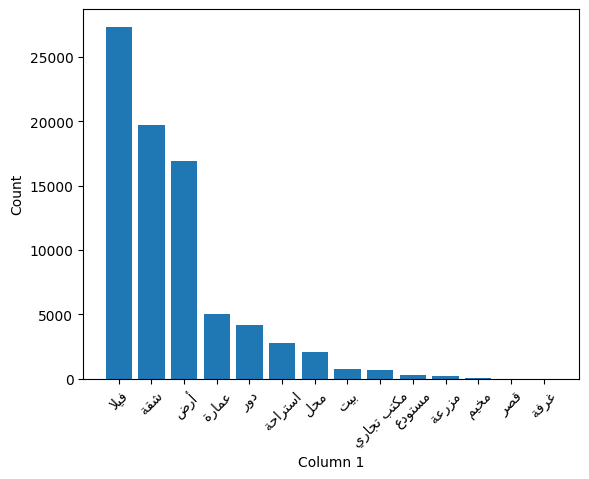

In [54]:
counts = df['property_type'].value_counts()
x = []
for i in counts.index:
    x.append(modify_arabic_display(i))
plt.bar(x, counts.values)
plt.xlabel("Column 1")
plt.ylabel("Count")
plt.xticks(rotation=45)
# plt.tight_layout()

plt.show()

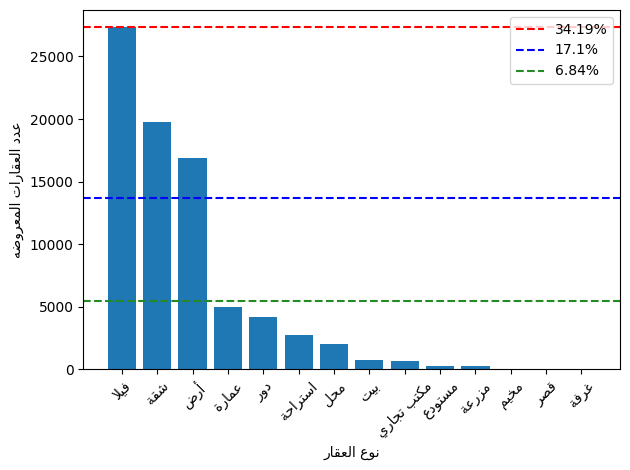

In [55]:
# we 
counts = df['property_type'].value_counts()
total = counts.sum()

x = []
#change to utf-8
for i in counts.index:
    x.append(modify_arabic_display(i))
# X has the value of index in df['property_type'] and y has the the value of it 
y = counts.values
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.bar(x, y)
ax.set_xlabel(modify_arabic_display("نوع العقار"))
ax.set_ylabel(modify_arabic_display("عدد العقارات المعروضه"))
ax.tick_params(axis='y')
plt.axhline(y = df[df['property_type']=='فيلا'].shape[0] , color = 'r', linestyle = 'dashed' , label = f"{round(df[df['property_type']=='فيلا'].shape[0]/df.shape[0]*100 , 2) }%")
plt.axhline(y = df[df['property_type']=='فيلا'].shape[0]/2 , color = 'b', linestyle = 'dashed' , label = f"{round((df[df['property_type']=='فيلا'].shape[0]/2)/df.shape[0]*100 , 2) }%")
plt.axhline(y = df[df['property_type']=='فيلا'].shape[0]/5 , color = '#228b22', linestyle = 'dashed' , label = f"{round((df[df['property_type']=='فيلا'].shape[0]/5)/df.shape[0]*100 , 2) }%")

plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [56]:
counts = df['property_type'].value_counts()
total = counts.sum()


In [57]:
gr = df.groupby('property_type').count().reset_index()
gr

,property_type,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,أرض,16873,16873,16873,16873,16873,16873,16873,16873,16873,...,16873,16873,16873,16873,16873,16873,16873,16873,16867,15150
1,استراحة,2768,2768,2768,2768,2768,2768,2768,2768,2768,...,2768,2768,2768,2768,2768,2768,2768,2768,2768,2488
2,بيت,724,724,724,724,724,724,724,724,724,...,724,724,724,724,724,724,724,724,724,715
3,دور,4203,4203,4203,4203,4203,4203,4203,4203,4203,...,4203,4203,4203,4203,4203,4203,4203,4203,4203,4199
4,شقة,19729,19729,19729,19729,19729,19729,19729,19729,19729,...,19729,19729,19729,19729,19729,19729,19729,19729,19729,19697
5,عمارة,5022,5022,5022,5022,5022,5022,5022,5022,5022,...,5022,5022,5022,5022,5022,5022,5022,5022,5022,4994
6,غرفة,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,فيلا,27345,27345,27345,27345,27345,27345,27345,27345,27345,...,27345,27345,27345,27345,27345,27345,27345,27345,27345,27224
8,قصر,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9,محل,2057,2057,2057,2057,2057,2057,2057,2057,2057,...,2057,2057,2057,2057,2057,2057,2057,2057,2056,2029


In [58]:
df['for_rent_or_sale'].value_counts()

للبيع      48685
للإيجار    31290
Name: for_rent_or_sale, dtype: int64

In [59]:
(df[df['property_type']=='فيلا'].shape[0]/3)/df.shape[0]

0.11397311659893716

In [60]:
counts.index

Index(['فيلا', 'شقة', 'أرض', 'عمارة', 'دور', 'استراحة', 'محل', 'بيت',
       'مكتب تجاري', 'مستودع', 'مزرعة', 'مخيم', 'قصر', 'غرفة'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79975 entries, 0 to 79974
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   creation_datetime          79975 non-null  object 
 1   updated_at                 79975 non-null  object 
 2   age_less_than              79975 non-null  int64  
 3   num_apartments             79975 non-null  int64  
 4   num_bedrooms               79975 non-null  int64  
 5   floor_num                  79975 non-null  int64  
 6   num_kitchens               79975 non-null  int64  
 7   closed                     79975 non-null  object 
 8   commercial_or_residential  79975 non-null  object 
 9   property_type              79975 non-null  object 
 10  driver_room                79975 non-null  object 
 11  duplex                     79975 non-null  object 
 12  family_or_single           79975 non-null  object 
 13  furnished                  79975 non-null  obj

## exploring  columns

In [62]:
df["updated_at" ] = pd.to_datetime(df["updated_at" ])
df["creation_datetime" ] = pd.to_datetime(df["creation_datetime" ])

In [63]:
((df["updated_at" ] - df["creation_datetime" ]).dt.days).value_counts()

0      26486
1       1985
2       1576
3       1372
10      1326
       ...  
518        1
724        1
640        1
620        1
475        1
Length: 657, dtype: int64

In [64]:
list(((df["updated_at" ] - df["creation_datetime" ]).dt.days).value_counts())

[26486,
 1985,
 1576,
 1372,
 1326,
 1238,
 1019,
 1013,
 880,
 876,
 831,
 785,
 766,
 674,
 624,
 603,
 594,
 593,
 558,
 558,
 551,
 507,
 501,
 457,
 456,
 444,
 434,
 427,
 426,
 413,
 412,
 411,
 408,
 406,
 398,
 391,
 380,
 374,
 373,
 365,
 343,
 339,
 334,
 334,
 330,
 327,
 321,
 316,
 312,
 310,
 307,
 282,
 274,
 271,
 270,
 263,
 261,
 261,
 260,
 258,
 255,
 252,
 251,
 247,
 243,
 236,
 232,
 223,
 218,
 218,
 216,
 215,
 203,
 193,
 193,
 188,
 184,
 180,
 179,
 178,
 175,
 173,
 163,
 160,
 160,
 160,
 159,
 159,
 154,
 153,
 153,
 153,
 153,
 151,
 151,
 148,
 147,
 146,
 140,
 140,
 137,
 136,
 135,
 134,
 133,
 132,
 131,
 131,
 130,
 129,
 127,
 125,
 124,
 124,
 122,
 122,
 121,
 121,
 121,
 119,
 118,
 117,
 115,
 115,
 114,
 114,
 114,
 111,
 108,
 107,
 106,
 106,
 105,
 105,
 103,
 103,
 103,
 103,
 101,
 101,
 99,
 97,
 95,
 95,
 94,
 92,
 92,
 89,
 89,
 89,
 82,
 82,
 82,
 80,
 80,
 79,
 79,
 76,
 76,
 76,
 75,
 75,
 70,
 69,
 69,
 68,
 68,
 68,
 67,
 65,
 

In [65]:
((df["updated_at" ] - df["creation_datetime" ]).dt.days).value_counts()[0]/df.shape[0]

0.3311784932791497

In [66]:
df = df.drop(['updated_at'] , axis= 1)


In [67]:
df.describe()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,Latitude,Longitude
count,79975.000000,79975.000000,79975.000000,79975.000000,79975.000000,79975.00000,7.997500e+04,7.997500e+04,79975.000000,7.997500e+04,79975.000000,79975.000000,79975.000000,79975.000000
mean,2.577243,1.059944,2.563926,0.447915,0.553398,1.07141,4.164485e+05,9.254068e+08,0.356324,4.439294e+05,16.476261,2.251929,24.746980,46.690735
std,5.696260,3.829860,2.022601,0.958806,0.596332,1.10410,2.937905e+07,7.348788e+10,5.843536,2.681608e+07,17.137501,1.904128,0.113882,0.107782
min,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,24.299600,46.298200
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,3.500000e+04,0.000000,1.100000e+02,0.000000,0.000000,24.661650,46.615600
50%,0.000000,0.000000,3.000000,0.000000,1.000000,1.00000,0.000000e+00,7.000000e+05,0.000000,3.750000e+02,15.000000,2.000000,24.781000,46.680600
75%,2.000000,0.000000,5.000000,1.000000,1.000000,2.00000,0.000000e+00,1.717950e+06,0.000000,6.600000e+02,20.000000,4.000000,24.822000,46.779900
max,36.000000,90.000000,5.000000,20.000000,5.000000,5.00000,2.147480e+09,1.000000e+13,800.000000,2.147484e+09,100.000000,5.000000,25.156200,47.319400


In [68]:
df['property_type'].value_counts()

فيلا          27345
شقة           19729
أرض           16873
عمارة          5022
دور            4203
استراحة        2768
محل            2057
بيت             724
مكتب تجاري      655
مستودع          301
مزرعة           239
مخيم             55
قصر               2
غرفة              2
Name: property_type, dtype: int64

## understanding the dataSet

In [69]:
df['region_name_en'].value_counts()

Riyadh    79975
Name: region_name_en, dtype: int64

In [70]:
df.describe()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,Latitude,Longitude
count,79975.000000,79975.000000,79975.000000,79975.000000,79975.000000,79975.00000,7.997500e+04,7.997500e+04,79975.000000,7.997500e+04,79975.000000,79975.000000,79975.000000,79975.000000
mean,2.577243,1.059944,2.563926,0.447915,0.553398,1.07141,4.164485e+05,9.254068e+08,0.356324,4.439294e+05,16.476261,2.251929,24.746980,46.690735
std,5.696260,3.829860,2.022601,0.958806,0.596332,1.10410,2.937905e+07,7.348788e+10,5.843536,2.681608e+07,17.137501,1.904128,0.113882,0.107782
min,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,24.299600,46.298200
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,3.500000e+04,0.000000,1.100000e+02,0.000000,0.000000,24.661650,46.615600
50%,0.000000,0.000000,3.000000,0.000000,1.000000,1.00000,0.000000e+00,7.000000e+05,0.000000,3.750000e+02,15.000000,2.000000,24.781000,46.680600
75%,2.000000,0.000000,5.000000,1.000000,1.000000,2.00000,0.000000e+00,1.717950e+06,0.000000,6.600000e+02,20.000000,4.000000,24.822000,46.779900
max,36.000000,90.000000,5.000000,20.000000,5.000000,5.00000,2.147480e+09,1.000000e+13,800.000000,2.147484e+09,100.000000,5.000000,25.156200,47.319400


In [71]:
df['price_per_meter']

0           0
1        1000
2           0
3           0
4         205
         ... 
79970       0
79971    2200
79972    2200
79973       0
79974       0
Name: price_per_meter, Length: 79975, dtype: int64

# observing the age of property

In [72]:
df[df['floor_num'] == df['floor_num'].min()]

,creation_datetime,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
9602,2015-05-12 20:00:19,2,0,0,-1,0,مغلق,غير محدد,مكتب تجاري,لا يوجد غرفة سائق,...,555,شرق,30,للإيجار,0,24.7252,46.8225,Riyadh,AR RIYADH,An Nasim Al Gharbi
42351,2015-05-12 19:58:43,-1,0,0,-1,0,مغلق,سكني,أرض,لا يوجد غرفة سائق,...,255,شمال,0,للبيع,0,24.7252,46.8225,Riyadh,AR RIYADH,An Nasim Al Gharbi
56672,2015-04-29 16:51:01,-1,0,3,-1,3,مغلق,غير محدد,استراحة,لا يوجد غرفة سائق,...,555,غير محدد,0,للإيجار,3,24.6970,46.8453,Riyadh,AR RIYADH,As Saadah


### these two row doesnot indicate anything so dropping them idea since they are only two rows and that will fix both age_less_than & floor_num

In [73]:
df = df.drop(df[df['floor_num'] == df['floor_num'].min()].index, axis=0)

we can see that most of our house are less than 2 actually  75% of them are under 2 years as the red line shows

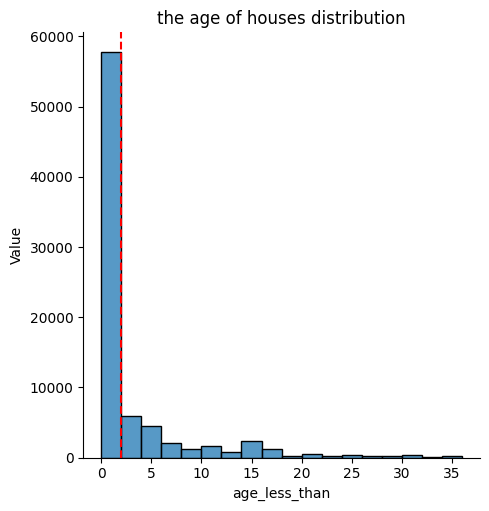

In [74]:
sns.displot(df['age_less_than'] , binwidth=2)
plt.xlabel('age_less_than')
plt.ylabel('Value')
plt.title('the age of houses distribution')

plt.axvline(x=df['age_less_than'].describe()[-2], color='red', linestyle='--')

plt.show()

In [75]:
df['for_rent_or_sale'].value_counts()

للبيع      48684
للإيجار    31288
Name: for_rent_or_sale, dtype: int64

In [76]:
df[df['for_rent_or_sale'] == 'للإيجار']['age_less_than'].describe()

count    31288.000000
mean         2.899259
std          5.204921
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         36.000000
Name: age_less_than, dtype: float64

In [77]:
df["num_apartments"].value_counts()

0     63397
2      6051
1      3179
3      2964
4       536
14      431
30      410
8       392
6       365
5       220
7       201
9       172
10      171
11      161
12      160
16      111
24      106
28      104
15      103
18       97
13       94
22       81
21       63
20       63
17       63
27       39
23       37
26       36
19       33
25       32
29       29
42       10
32       10
36        9
60        4
41        4
34        3
56        3
48        3
33        2
47        2
40        2
50        2
39        2
35        2
38        1
37        1
43        1
57        1
55        1
52        1
53        1
90        1
31        1
77        1
51        1
49        1
44        1
Name: num_apartments, dtype: int64

In [78]:
df['num_bedrooms'].value_counts()

0    25589
5    20293
3    13142
4    12786
2     4850
1     3312
Name: num_bedrooms, dtype: int64

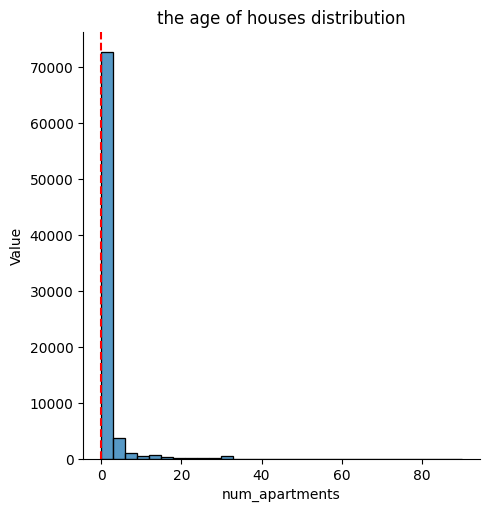

In [79]:
sns.displot(df['num_apartments'] , binwidth=3)
plt.xlabel('num_apartments')
plt.ylabel('Value')
plt.title('the age of houses distribution')

plt.axvline(x=df['num_apartments'].describe()[-2], color='red', linestyle='--')

plt.show()

make comparison between rent and sold

# villa

## district_name_en work with

In [80]:
# Group['for_rent_or_sale'][0]

In [346]:

    
Vdfs.price.describe()

count    2.439900e+04
mean     9.233925e+08
std      7.042187e+10
min      1.000000e+00
25%      1.150000e+06
50%      1.500000e+06
75%      2.300000e+06
max      8.888890e+12
Name: price, dtype: float64

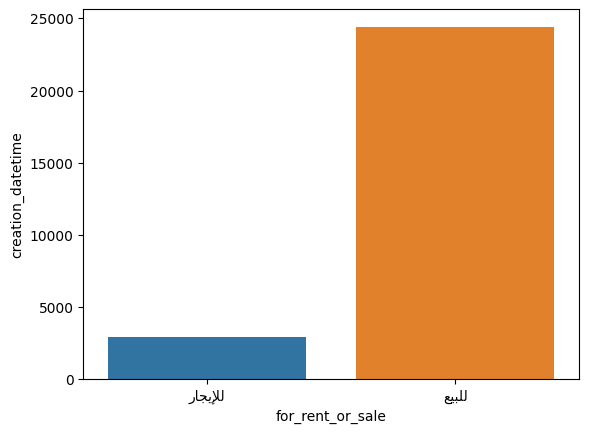

In [81]:
Group = Vdf.groupby('for_rent_or_sale').count().reset_index() 
t = []
for i in Group['for_rent_or_sale']:
    t.append(modify_arabic_display(i))
sns.barplot(x = 'for_rent_or_sale' , y = 'creation_datetime' ,data= Group)
plt.xticks(Group['for_rent_or_sale'].index, t)

plt.show()
# Group

In [82]:
Vdfs = Vdf[Vdf['for_rent_or_sale'] == 'للبيع']

In [83]:
Vdfs

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-03-04 13:49:48,2016-06-02 07:07:34,0,1,4,0,1,مغلق,غير محدد,فيلا,...,297,شمال,15,للبيع,5,24.8402,46.7528,Riyadh,AR RIYADH,Al Munsiyah
2,2016-01-05 21:26:47,2016-03-05 18:25:43,0,0,5,0,1,مغلق,غير محدد,فيلا,...,750,شرق,20,للبيع,5,24.8131,46.5991,Riyadh,AL WUSAYL,Al Malqa
3,2016-02-04 09:29:46,2016-02-04 09:29:58,0,0,1,0,1,مغلق,غير محدد,فيلا,...,500,شمال,5,للبيع,1,24.6738,46.7369,Riyadh,AR RIYADH,Al Malaz
6,2016-08-11 05:21:34,2016-09-06 15:54:32,0,2,4,0,1,متاح,غير محدد,فيلا,...,360,شمال,15,للبيع,4,24.8285,46.7451,Riyadh,AR RIYADH,Qurtubah
9,2016-01-16 13:41:09,2016-02-13 18:51:43,0,0,3,0,1,مغلق,غير محدد,فيلا,...,250,غرب,20,للبيع,3,24.8497,46.6688,Riyadh,AL WUSAYL,An Narjis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79955,2016-08-06 09:03:00,2016-08-07 11:12:33,12,0,5,0,1,مغلق,غير محدد,فيلا,...,325,شمال شرقي,15,للبيع,5,24.6040,46.6578,Riyadh,LABAN,Dhahrat Al Badiah
79956,2015-08-29 17:16:01,2016-05-15 14:22:20,7,3,4,0,1,مغلق,سكني,فيلا,...,600,شمال,20,للبيع,5,24.7991,46.7993,Riyadh,AR RIYADH,Ishbiliyah
79962,2016-07-12 13:39:13,2016-07-23 11:39:23,0,0,4,0,1,متاح,غير محدد,فيلا,...,375,شمال,20,للبيع,4,24.8153,46.6533,Riyadh,AD DIR'IYAH,Al Yasmin
79964,2016-08-25 05:03:39,2016-09-07 04:20:11,0,0,5,0,1,متاح,غير محدد,فيلا,...,400,جنوب غربي,25,للبيع,5,24.6201,46.5420,Riyadh,UBAYR,Dhahrat Laban


In [84]:
Group = Vdf.groupby('street_direction').sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_1540\3492406301.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



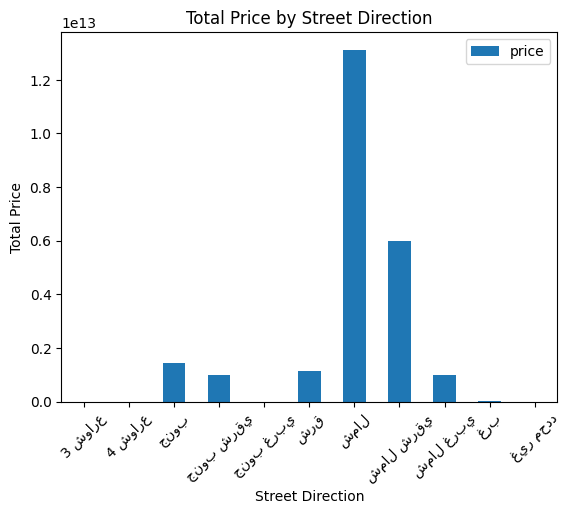

In [85]:
Group.plot.bar(y='price', rot=45)
plt.title("Total Price by Street Direction")
plt.xlabel("Street Direction")
plt.ylabel("Total Price")
plt.show()




In [86]:
# import folium

# # create a map centered on the mean latitude and longitude
# mean_lat = Vdfs['Latitude'].mean()
# mean_lon = Vdfs['Longitude'].mean()
# m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

# # add markers for each row in the dataframe
# for i, row in Vdfs.iterrows():
#     folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
#                         radius=5, color='red',
#                         fill=True, fill_color='red',
#                         fill_opacity=0.7,
#                         popup=str(row['price'])).add_to(m)

# # show the map
# m


In [88]:
# import plotly.express as px

# # create a scatter plot
# fig = px.scatter(df, x="Longitude", y="Latitude", color="price",
#                  size="price", size_max=15,
#                  hover_data=["price"])

# # show the plot
# fig.show()


In [89]:
Vdfs.area.describe()

count    2.439900e+04
mean     1.909732e+05
std      1.665761e+07
min      0.000000e+00
25%      3.120000e+02
50%      4.000000e+02
75%      5.000000e+02
max      2.147484e+09
Name: area, dtype: float64

In [374]:
Vdfs = Vdfs[Vdfs['area']>100]

In [375]:
Vdfs.area.describe()

count    2.365900e+04
mean     1.969463e+05
std      1.691609e+07
min      1.020000e+02
25%      3.250000e+02
50%      4.000000e+02
75%      5.100000e+02
max      2.147484e+09
Name: area, dtype: float64

In [378]:
Vdfs[Vdfs['area']<150]['price'].mean()

664624.4827586206

C:\Users\hp\AppData\Local\Temp\ipykernel_1540\3546487314.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



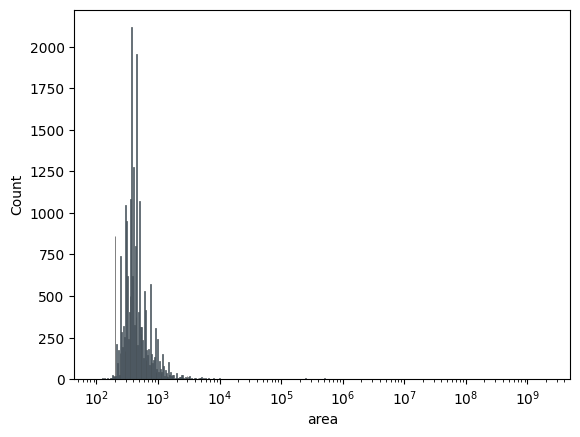

In [379]:
sns.histplot(
    Vdfs,
    x="area", #hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [450]:
Vdfs = Vdfs[Vdfs.area < np.percentile(Vdfs.area , [99])[0]]

C:\Users\hp\AppData\Local\Temp\ipykernel_1540\1768928178.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



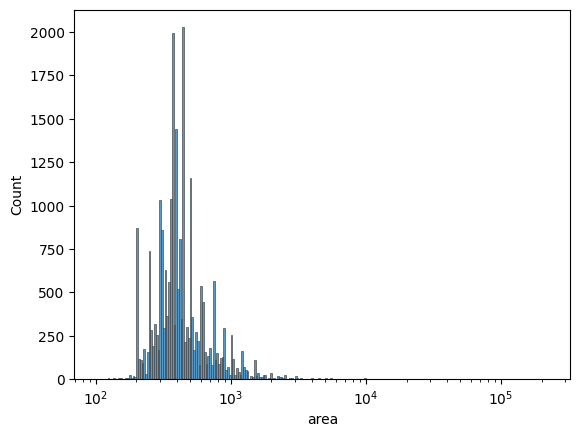

In [447]:
sns.histplot(
    Vdfs,
    x="area", 
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [443]:
Vdfs = Vdfs[Vdfs.price < np.percentile(Vdfs.price , [99.2])[0]]


In [451]:
Vdfs.area.max()

1861

In [ ]:
sns.boxplot()

# the realoation between area and land

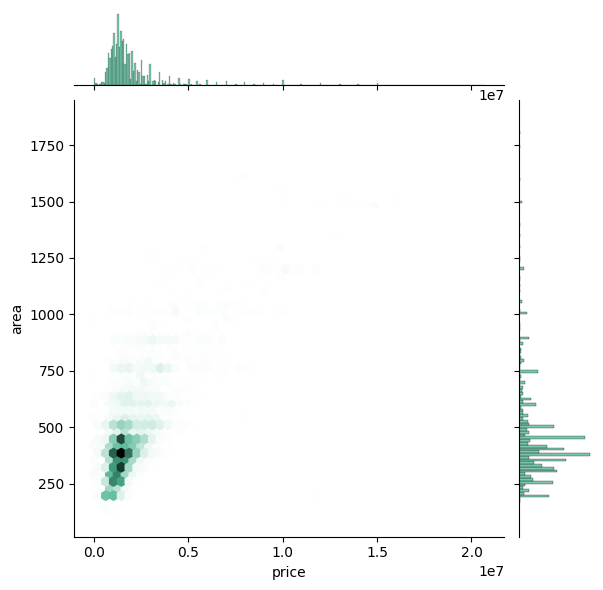

In [452]:

# # rs = np.random.RandomState(11)
# x = Vdfs['area'].gamma(2, size=1000)
# y = -.5 * x + rs.normal(size=1000)

sns.jointplot(y=Vdfs['area'], x=Vdfs['price'], kind="hex", color="#4CB391")

# price_per_m

In [90]:
Vdfs['price_per_m'] = Vdfs['price'] / Vdfs['area']
Vdfs['price_per_m'].replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1540\262927720.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_1540\262927720.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [453]:
import plotly.express as px
def color_points(price_per_m):
    if  price_per_m >= int(Vdfs['price_per_m'].quantile([0.75]))  and price_per_m > int(Vdfs['price_per_m'].quantile([0.95])):
         return "top 25%"
    elif price_per_m >= Vdfs['price_per_m'].median() :
        return "more than average "
    elif price_per_m > 100 and price_per_m < Vdfs['price_per_m'].median() :
        return "less than average"
    else:
        return "not known "
# create a scatter plot map centered on Riyadh
fig = px.scatter_mapbox(Vdfs, lat="Latitude", lon="Longitude", color=Vdfs["price_per_m"].apply(color_points),
                        # size="price_per_m",
                        size_max=50,
                        hover_data=[ 'price_per_m' ],
                        mapbox_style="open-street-map",
                        center=dict(lat=24.7136, lon=46.6753),
                        zoom=10,
                        title="price in location for sold villas",
                        color_discrete_sequence=["red", "green", "blue" , "#D6D5CB"],
                        )

# show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## apartment 

In [92]:
Adf.describe()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,Latitude,Longitude
count,19729.000000,19729.000000,19729.000000,19729.00000,19729.000000,19729.000000,19729.000000,1.972900e+04,19729.000000,1.972900e+04,19729.000000,19729.000000,19729.000000,19729.000000
mean,2.523088,0.022556,2.900147,1.56602,0.760201,0.985960,1.155203,7.508933e+08,0.013179,2.731057e+04,3.488013,2.081504,24.741206,46.703200
std,4.424606,0.676740,1.030980,1.24295,0.439606,0.436865,53.737629,7.287259e+10,0.682097,3.795327e+06,10.575376,0.763130,0.092509,0.093833
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,24.474100,46.394100
25%,0.000000,0.000000,2.000000,1.00000,1.000000,1.000000,0.000000,1.800000e+04,0.000000,0.000000e+00,0.000000,2.000000,24.676400,46.623300
50%,0.000000,0.000000,3.000000,1.00000,1.000000,1.000000,0.000000,2.400000e+04,0.000000,0.000000e+00,0.000000,2.000000,24.778600,46.709800
75%,3.000000,0.000000,4.000000,2.00000,1.000000,1.000000,0.000000,3.300000e+04,0.000000,0.000000e+00,0.000000,2.000000,24.809800,46.786100
max,36.000000,30.000000,5.000000,20.00000,5.000000,5.000000,3971.000000,1.000000e+13,50.000000,5.330882e+08,100.000000,5.000000,25.031600,47.027000


In [93]:
Adf["price_per_meter"] = Adf['price'] / Adf['area']

In [94]:
Adf['price_per_meter'].replace([np.inf, -np.inf], 0, inplace=True)

In [95]:
Adf.describe()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,Latitude,Longitude
count,19729.000000,19729.000000,19729.000000,19729.00000,19729.000000,19729.000000,1.972900e+04,1.972900e+04,19729.000000,1.972900e+04,19729.000000,19729.000000,19729.000000,19729.000000
mean,2.523088,0.022556,2.900147,1.56602,0.760201,0.985960,7.837417e+04,7.508933e+08,0.013179,2.731057e+04,3.488013,2.081504,24.741206,46.703200
std,4.424606,0.676740,1.030980,1.24295,0.439606,0.436865,7.863424e+06,7.287259e+10,0.682097,3.795327e+06,10.575376,0.763130,0.092509,0.093833
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,24.474100,46.394100
25%,0.000000,0.000000,2.000000,1.00000,1.000000,1.000000,0.000000e+00,1.800000e+04,0.000000,0.000000e+00,0.000000,2.000000,24.676400,46.623300
50%,0.000000,0.000000,3.000000,1.00000,1.000000,1.000000,0.000000e+00,2.400000e+04,0.000000,0.000000e+00,0.000000,2.000000,24.778600,46.709800
75%,3.000000,0.000000,4.000000,2.00000,1.000000,1.000000,0.000000e+00,3.300000e+04,0.000000,0.000000e+00,0.000000,2.000000,24.809800,46.786100
max,36.000000,30.000000,5.000000,20.00000,5.000000,5.000000,1.000000e+09,1.000000e+13,50.000000,5.330882e+08,100.000000,5.000000,25.031600,47.027000


In [96]:
Adf['for_rent_or_sale']

4        للإيجار
8        للإيجار
11       للإيجار
14         للبيع
19         للبيع
          ...   
79959    للإيجار
79967    للإيجار
79968    للإيجار
79970    للإيجار
79974    للإيجار
Name: for_rent_or_sale, Length: 19729, dtype: object

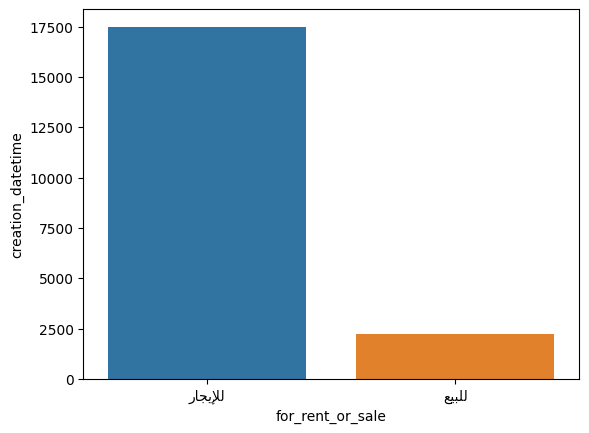

In [97]:
Group = Adf.groupby('for_rent_or_sale').count().reset_index() 
t = []
for i in Group['for_rent_or_sale']:
    t.append(modify_arabic_display(i))
sns.barplot(x = 'for_rent_or_sale' , y = 'creation_datetime' ,data= Group)
plt.xticks(Group['for_rent_or_sale'].index, t)

plt.show()
# Group

In [98]:
Adfr = Adf[Adf["for_rent_or_sale"] == "للإيجار"]

In [99]:
Adfr.columns

Index(['creation_datetime', 'updated_at', 'age_less_than', 'num_apartments',
       'num_bedrooms', 'floor_num', 'num_kitchens', 'closed',
       'commercial_or_residential', 'property_type', 'driver_room', 'duplex',
       'family_or_single', 'furnished', 'num_living_rooms', 'maid_room',
       'price_per_meter', 'advertiser_type', 'pool', 'paid', 'price',
       'rent_period', 'num_rooms', 'area', 'street_direction', 'street_width',
       'for_rent_or_sale', 'num_water_cycles', 'Latitude', 'Longitude',
       'region_name_en', 'nearest_city_name_en', 'district_name_en'],
      dtype='object')

## is floor num affect price ? / num_water_cycles


## is single pay more or less ? per meter

# rent_period count

# outliers

In [254]:
Adfr = Adfr[Adfr['price']< np.percentile(Adfr.price, [98])[0]]

In [255]:
Adfr.district_name_en.value_counts()#[0]/Adfr.shape[0]

Dhahrat Laban                                   1058
Al Malqa                                        1044
Al Aqiq                                          832
Al Yarmuk                                        786
Al Khalij                                        756
                                                ... 
An Nasriyah                                        1
Al Imam Muhammed Ibn Saud Islamic University       1
Al Batha                                           1
Mansuriyah                                         1
Al Ghnamiah                                        1
Name: district_name_en, Length: 156, dtype: int64

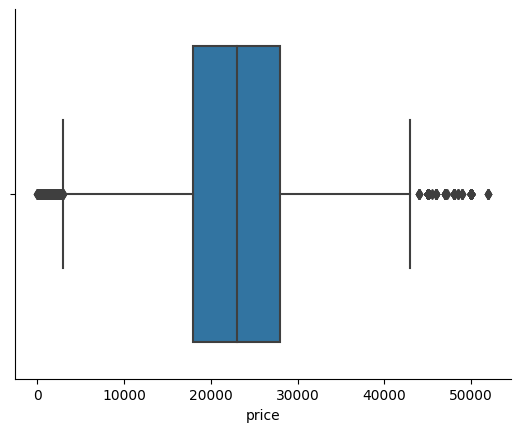

In [334]:
sns.boxplot(x="price",
            # palette=["m", "g"],
            data=Adfr)
sns.despine()

In [256]:
Adfr = Adfr.drop(['updated_at' , "creation_datetime" , 'num_apartments' ,'property_type' , 'driver_room' , 'duplex' , 'maid_room', 'pool' , 'paid' , 'street_direction', 'street_width','for_rent_or_sale','region_name_en'], axis=1)

KeyError: "['updated_at', 'creation_datetime', 'num_apartments', 'property_type', 'driver_room', 'duplex', 'maid_room', 'pool', 'paid', 'street_direction', 'street_width', 'for_rent_or_sale', 'region_name_en'] not found in axis"

In [257]:
Adfr.price.value_counts()

25000    1311
20000    1300
18000     997
30000     993
22000     961
         ... 
170         1
230         1
780         1
3200        1
4075        1
Name: price, Length: 276, dtype: int64

In [258]:
Group = Adfr.groupby('district_name_en').size().reset_index(name="count")
Group = Group.sort_values(by='count', ascending=False).head(10)
Group

,district_name_en,count
117,Dhahrat Laban,1058
37,Al Malqa,1044
8,Al Aqiq,832
70,Al Yarmuk,786
30,Al Khalij,756
49,Al Munsiyah,753
92,Ar Rimal,732
140,Qurtubah,695
71,Al Yasmin,557
125,Ishbiliyah,538


[Text(0, 0, 'Dhahrat Laban'),
 Text(1, 0, 'Al Malqa'),
 Text(2, 0, 'Al Aqiq'),
 Text(3, 0, 'Al Yarmuk'),
 Text(4, 0, 'Al Khalij'),
 Text(5, 0, 'Al Munsiyah'),
 Text(6, 0, 'Ar Rimal'),
 Text(7, 0, 'Qurtubah'),
 Text(8, 0, 'Al Yasmin'),
 Text(9, 0, 'Ishbiliyah')]

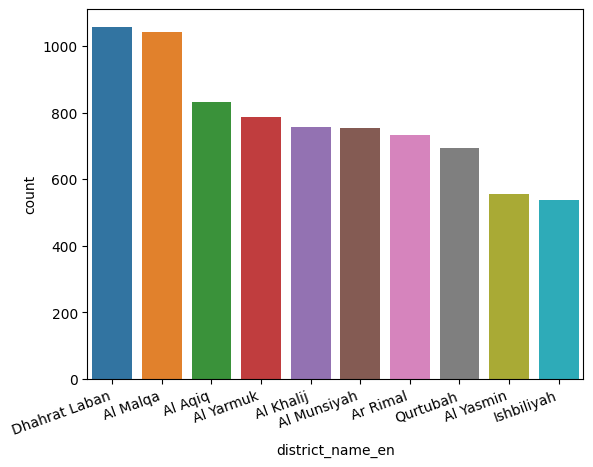

In [259]:
plot =sns.barplot(data= Group , x = 'district_name_en' , y ='count')
plot.set_xticklabels(plot.get_xticklabels(), rotation=20, ha='right')


In [260]:
Adfr['rent_period'].value_counts()

سنوي    15695
شهري      985
يومي      406
Name: rent_period, dtype: int64

In [261]:
Adfr = Adfr[~Adfr["rent_period"].isin(['4','5','غير محدد' , '6'])]

In [262]:
gr = Adfr.groupby('rent_period').count().reset_index()

In [263]:
gr

,rent_period,age_less_than,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,family_or_single,furnished,num_living_rooms,price_per_meter,advertiser_type,price,num_rooms,area,num_water_cycles,Latitude,Longitude,nearest_city_name_en,district_name_en
0,سنوي,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15695,15670
1,شهري,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,985,983
2,يومي,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406


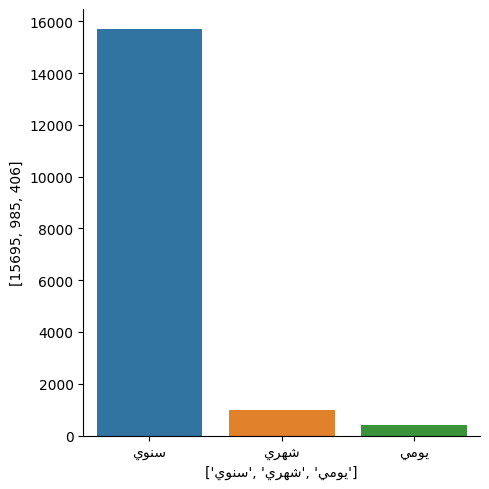

In [264]:
sns.catplot(
    
    data=gr,
    kind='bar',
    x = modify_arabic_display( list(gr.rent_period)),
    y = list(gr.age_less_than)
    
)

In [274]:
Group = Adfr.groupby('district_name_en').count().reset_index()
Group = Group.sort_values(by='price', ascending=False).head(10)
Group

,district_name_en,age_less_than,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,family_or_single,furnished,num_living_rooms,price_per_meter,advertiser_type,price,rent_period,num_rooms,area,num_water_cycles,Latitude,Longitude,nearest_city_name_en
117,Dhahrat Laban,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
37,Al Malqa,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
8,Al Aqiq,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832,832
70,Al Yarmuk,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786
30,Al Khalij,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756,756
49,Al Munsiyah,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753,753
92,Ar Rimal,732,732,732,732,732,732,732,732,732,732,732,732,732,732,732,732,732,732,732
140,Qurtubah,695,695,695,695,695,695,695,695,695,695,695,695,695,695,695,695,695,695,695
71,Al Yasmin,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557
125,Ishbiliyah,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538,538


In [275]:
highest = list(Group['district_name_en'])

In [276]:
Adfr[Adfr['district_name_en'] ==highest[0]or[Adfr['district_name_en'] ==highest[1] ]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [337]:
violin = Adfr[(Adfr['district_name_en'] == highest[0]) | (Adfr['district_name_en'] == highest[1])| (Adfr['district_name_en'] == highest[2]) | (Adfr['district_name_en'] == highest[3])| (Adfr['district_name_en'] == highest[4])]


In [338]:
violin

,age_less_than,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,family_or_single,furnished,num_living_rooms,price_per_meter,advertiser_type,price,rent_period,num_rooms,area,num_water_cycles,Latitude,Longitude,nearest_city_name_en,district_name_en
32,1,2,1,1,مغلق,غير محدد,عزاب,لا يوجد اثاث,1,0.0,مسوق,28000,يومي,0,0,2,24.8071,46.5994,ABA AL KIBASH,Al Malqa
37,0,1,1,1,مغلق,غير محدد,عزاب,لا يوجد اثاث,0,0.0,مسوق,15000,يومي,0,0,1,24.7890,46.6158,AD DIR'IYAH,Al Malqa
39,3,3,1,1,مغلق,غير محدد,عوائل,لا يوجد اثاث,1,0.0,مسوق,30000,سنوي,0,0,2,24.7816,46.6232,AD DIR'IYAH,Al Aqiq
55,1,3,2,0,متاح,غير محدد,عوائل,لا يوجد اثاث,1,0.0,مسوق,25000,سنوي,0,0,2,24.7916,46.8155,AR RIYADH,Al Khalij
66,1,3,3,0,متاح,غير محدد,عوائل,لا يوجد اثاث,1,0.0,مسوق,23000,سنوي,0,0,2,24.7814,46.8156,AR RIYADH,Al Khalij
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79845,0,1,0,1,مغلق,غير محدد,عزاب,لا يوجد اثاث,1,0.0,مسوق,23000,سنوي,0,0,1,24.8061,46.5994,ABA AL KIBASH,Al Malqa
79848,2,3,1,1,متاح,غير محدد,عوائل,لا يوجد اثاث,1,0.0,مسوق,32000,سنوي,0,0,2,24.7865,46.6270,AD DIR'IYAH,Al Aqiq
79877,0,3,2,0,مغلق,غير محدد,عوائل,لا يوجد اثاث,1,0.0,مسوق,26000,سنوي,0,0,2,24.7610,46.7896,AR RIYADH,Al Khalij
79880,4,4,1,1,متاح,غير محدد,عوائل,لا يوجد اثاث,1,0.0,مسوق,25000,سنوي,0,0,2,24.7829,46.8212,AR RIYADH,Al Khalij


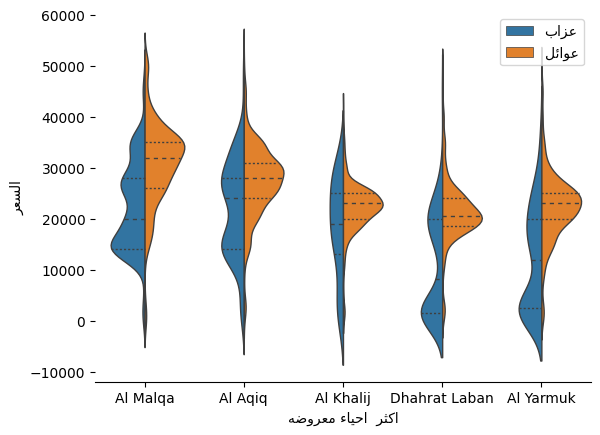

In [340]:
sns.violinplot(data=violin, 
               x="district_name_en", 
               y="price", 
               hue="family_or_single",
               split=True, inner="quart", linewidth=1,   
               # palette={"Yes": "b", "No": ".85"}
            
            )
handles, label = plt.gca().get_legend_handles_labels() # this will take the text inside the graph in labels
plt.legend(handles, modify_arabic_display(label))

plt.xlabel(modify_arabic_display("اكثر  احياء معروضه"))
plt.ylabel(modify_arabic_display("السعر"))
# sns.despine(left=True
sns.despine(left=True)

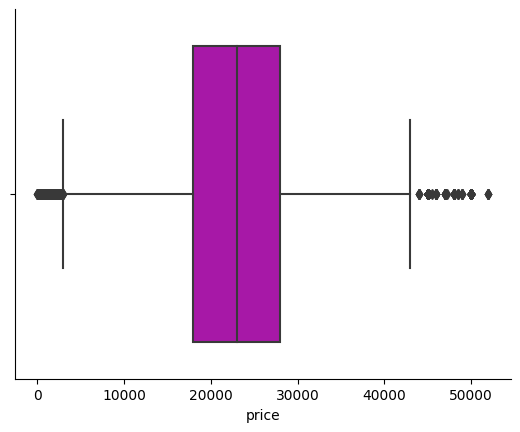

In [282]:

              #, interpolation='midpoint')